In [2]:
from pylab import *
from ipywidgets import interact
g = 9.8


def flight_time(VI,θ,m,b):
    flight_time = (2*VI*sin(θ*pi/180))/g

    TT=linspace(0.0,flight_time,1000) #array of time based on flight_time
    X_Range = (TT*VI*cos(θ * pi/180)) 
    Y_Height = ((TT* VI*sin(θ * pi/180)) - ((1/2)*g*(TT**2)))
    
    XR_Drag = (VI*cos(θ * pi/180)*(m/b))*(1-e**(-(b*TT)/m))
    YH_Drag = ((m**(2)*g+b*m*VI*sin(θ * pi/180))/(b**2))*(1-e**(-(b*TT)/m))-((m*g*TT)/b)
    
    fig1 = figure(figsize=(8,8));
    plot(X_Range,Y_Height,color='blue',linewidth=2,label='No Drag')  
    plot(XR_Drag,YH_Drag,color='red',linewidth=2,label='Linear Drag')

    i=0
    while YH_Drag[i] >= 0:
        i += 1
    else:
        print('Linear Drag Range: %.3f meters' %(XR_Drag[i]))
        print('Linear Drag Max Height: %.3f meters' %(max(YH_Drag)))
        print('Linear Drag Flight time: %.3f seconds' %(TT[i]))
        
    rcParams.update({'font.size': 20})
    xlim(0,X_Range[999])
    ylim(0,max(Y_Height)+1)
    title('Air Resistance Simulation', fontsize=25)
    xlabel('$Range$ (meters)', fontsize=25)
    ylabel('$Height$ (meters)', fontsize=25)
    legend(loc='upper left',fontsize=15)
    grid(color='gray', linestyle='-', linewidth=.5)
    
    #print(X_Range[99],Y_Height[99])
    #print(XR_Drag[99],YH_Drag[99])
    
interact(flight_time, VI=(1,50,1), θ=(1,89,1),m=(1,10,1),b=(.1,1,.1))


interactive(children=(IntSlider(value=25, description='VI', max=50, min=1), IntSlider(value=45, description='θ…

<function __main__.flight_time(VI, θ, m, b)>

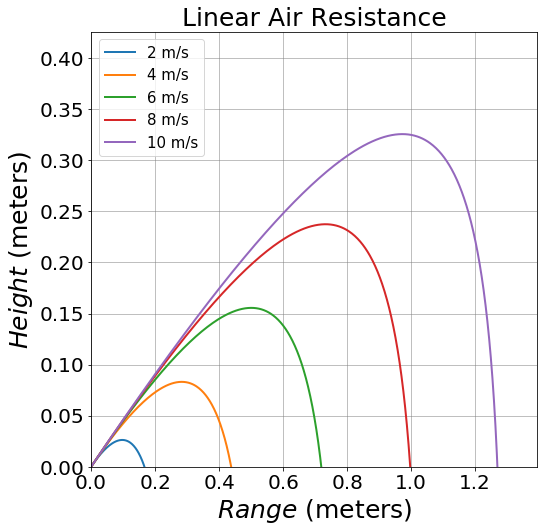

In [11]:
θ = 25
b = .7
m = .10
VO = [2,4,6,8,10]

TT=linspace(0.0,1.5,1000)

fig1 = figure(figsize=(8,8));
for i in range(5):
    XR_Drag2 = (VO[i]*cos(θ * pi/180)*(m/b))*(1-e**(-(b*TT)/m))
    YH_Drag2 = ((m**(2)*g+b*m*VO[i]*sin(θ * pi/180))/(b**2))*(1-e**(-(b*TT)/m))-((m*g*TT)/b)
    plot(XR_Drag2, YH_Drag2, linewidth=2,label= str(VO[i]) + " m/s")


rcParams.update({'font.size': 20})
xlim(0,max(XR_Drag2+.1))
ylim(0,max(YH_Drag2+.1))
title('Linear Air Resistance', fontsize=25)
xlabel('$Range$ (meters)', fontsize=25)
ylabel('$Height$ (meters)', fontsize=25)
legend(loc='upper left',fontsize=15)
grid(color='gray', linestyle='-', linewidth=.5)

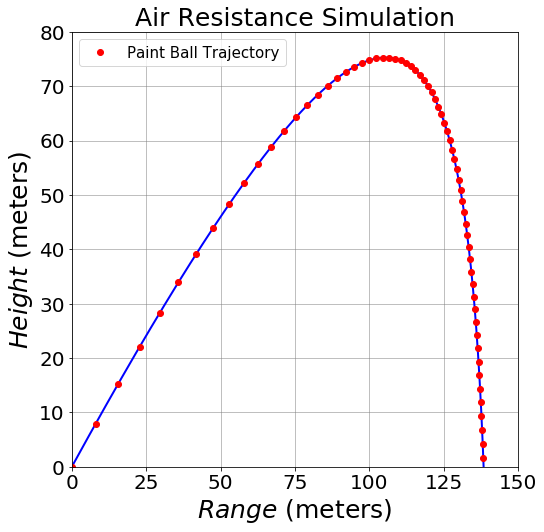

In [4]:
θ = 45
b = 0.00144
m = 0.0032
V0 = 90

cap = (2*V0*sin(θ*pi/180))/g

TTotal=linspace(0.0,cap,10000)
XR_Drag3 = (V0*cos(θ * pi/180)*(m/b))*(1-e**(-(b*TTotal)/m))
YH_Drag3 = ((m**(2)*g+b*m*V0*sin(θ * pi/180))/(b**2))*(1-e**(-(b*TTotal)/m))-((m*g*TTotal)/b)

fig1 = figure(figsize=(8,8));
plot(XR_Drag3, YH_Drag3, color='blue',linewidth=2)
plot(XR_Drag3[::100], YH_Drag3[::100],'or',linewidth=2, label='Paint Ball Trajectory')
rcParams.update({'font.size': 20})
xlim(0, 150)
ylim(0,80)
title('Air Resistance Simulation', fontsize=25)
xlabel('$Range$ (meters)', fontsize=25)
ylabel('$Height$ (meters)', fontsize=25)
legend(loc='upper left',fontsize=15)
grid(color='gray', linestyle='-', linewidth=.5)

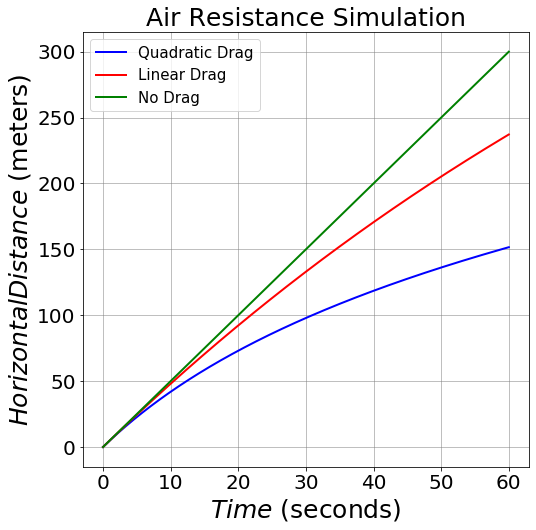

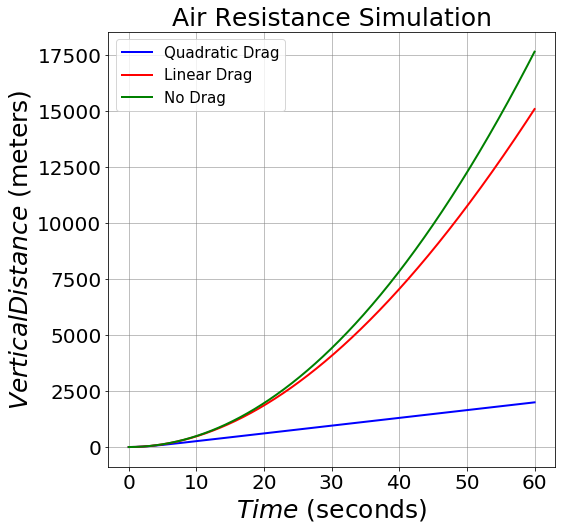

In [4]:
TD=linspace(0.0,60,1000)
M= 0.15
c=0.001225
VHI=5
b=0.001225

XR_Quad = (M/c)*log((1+TD/(M/(c*VHI))))
YH_Quad = (M/c)*log((cosh(g*TD/(((M*g)/c)**(1/2)))))

X_Drag = (VHI*(M/b))*(1-e**(-(b*TD)/M))
Y_Drag = abs(((M**(2)*g)/(b**2))*(1-e**(-(b*TD)/M))-((M*g*TD)/b))

X_NoDrag = (VHI*TD)
Y_NoDrag = (1/2)*g*(TD)**2

fig1 = figure(figsize=(8,8));
plot(TD, XR_Quad, color='blue',linewidth=2, label='Quadratic Drag')
plot(TD, X_Drag, color='red',linewidth=2, label='Linear Drag')
plot(TD, X_NoDrag, color='green',linewidth=2, label='No Drag')
rcParams.update({'font.size': 20})
title('Air Resistance Simulation', fontsize=25)
xlabel('$Time$ (seconds)', fontsize=25)
ylabel('$Horizontal Distance$ (meters)', fontsize=25)
legend(loc='upper left',fontsize=15)
grid(color='gray', linestyle='-', linewidth=.5)


fig2 = figure(figsize=(8,8));
plot(TD, YH_Quad, color='blue',linewidth=2, label='Quadratic Drag')
plot(TD, Y_Drag, color='red',linewidth=2, label='Linear Drag')
plot(TD, Y_NoDrag, color='green',linewidth=2, label='No Drag')
rcParams.update({'font.size': 20})
title('Air Resistance Simulation', fontsize=25)
xlabel('$Time$ (seconds)', fontsize=25)
ylabel('$Vertical Distance$ (meters)', fontsize=25)
legend(loc='upper left',fontsize=15)
grid(color='gray', linestyle='-', linewidth=.5)